# Assignment: Data-Load-Plot-CI

by Nick Lee Jerlung

In [111]:
# Import the necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

## 1 - Load the data

In [112]:
# Load the data from the Excel file
data = pd.read_excel("data/Demographic-data-Med2.xlsx", usecols=[1,2,3])

# Print the first five lines in data to establish what the data looks like
data.head(5)

,(Age) How old are you?,(Height) How tall are you (in cm)?,(Birthday) Is your birthday (day of month) on an even or odd date?
0,24,190,Odd
1,21,188,Odd
2,24,183,Odd
3,22,183,Odd
4,25,192,Even


In [113]:
# Check how many rows and columns in all
data.shape

(34, 3)

In [114]:
# Convert to data frame and describe the data
df = pd.DataFrame(data)
df.describe()

,(Age) How old are you?,(Height) How tall are you (in cm)?
count,34.000000,34.000000
mean,22.823529,181.500000
std,3.849208,9.336309
min,19.000000,159.000000
25%,21.000000,176.500000
50%,22.000000,182.500000
75%,23.000000,188.000000
max,40.000000,200.000000


## 2 - Remove the outliers

In [115]:
# First we define a function that removes outliers to avoid repeating code
def remove_outliers(df, column):
	q1 = df[column].quantile(0.25) # First quartile
	q3 = df[column].quantile(0.75) # Third quartile
	iqr = q3 - q1 # Inter quartile range

	lower_bound = q1 - 1.5 * iqr
	upper_bound = q3 + 1.5 * iqr

	df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)] # Remove outliers

	return df_no_outliers

# Use the function to remove outliers from the age and height columns
dfCleanAge = remove_outliers(df, df.columns[0])
dfCleanHeight = remove_outliers(df, df.columns[1])

In [116]:
# Describe the cleaned age data
dfCleanAge[df.columns[0]].describe()

count    31.000000
mean     21.838710
std       1.529636
min      19.000000
25%      21.000000
50%      22.000000
75%      23.000000
max      25.000000
Name: (Age) How old are you?, dtype: float64

In [117]:
# Describe the cleaned height data
dfCleanHeight[df.columns[1]].describe()

count     33.000000
mean     182.181818
std        8.578514
min      162.000000
25%      178.000000
50%      183.000000
75%      188.000000
max      200.000000
Name: (Height) How tall are you (in cm)?, dtype: float64

## 3 - Make box plots


### Age data

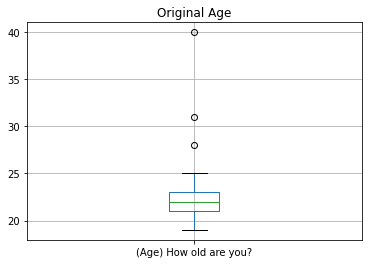

In [118]:
# Box plot of the original age data
df.boxplot(column=df.columns[0])
plt.title('Original Age')
plt.show()

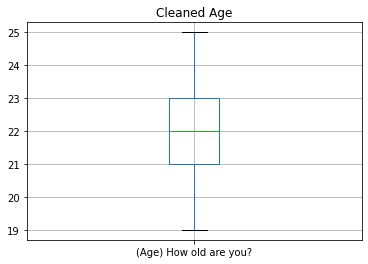

In [119]:
# Box plot of the cleaned age data
dfCleanAge.boxplot(column=df.columns[0])
plt.title('Cleaned Age')
plt.show()

### Height data

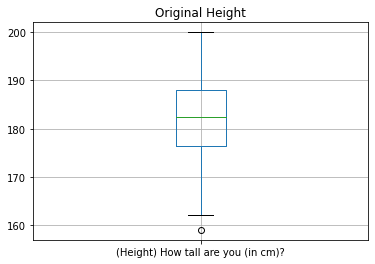

In [120]:
# Box plot of the original height data
df.boxplot(column=df.columns[1])
plt.title('Original Height')
plt.show()

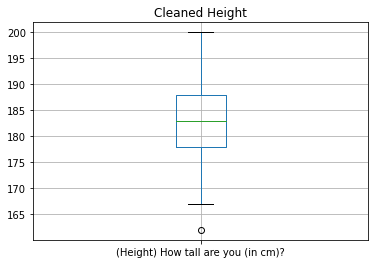

In [121]:
# Box plot of the cleaned height data
dfCleanHeight.boxplot(column=df.columns[1])
plt.title('Cleaned Height')
plt.show()

## 4 - Calculate 95% confidence intervals for heights

In [122]:
# In the name of readability, we'll define the variables we need for the calculation
height = dfCleanHeight[df.columns[1]] # The data

n = len(height) # Number of data points
mean = height.mean() # Mean
std = height.std() # Standard deviation
se = std / np.sqrt(n) # Standard error

# t-value for 95% ci and n-1 because it's a sample
t_value = st.t.ppf(1 - 0.025, df=n-1)

# Margin of error
margin_error = t_value * se

# And now we can calculate the confidence interval
confidence_interval = (mean - margin_error, mean + margin_error)

print("95% Confidence Interval:", confidence_interval)

95% Confidence Interval: (179.14000924565616, 185.22362711798021)
